In [1]:
!pip install 'zarr<3'
!pip install timm
!pip install openslide-python tiffslide
!pip install pyarrow
!pip install shapely
!pip install scikit-image
!pip install opencv-python

# Install CuPy (will auto-detect CUDA version)
#Install CuPy pre-built binary for CUDA 12.x
!pip install cupy-cuda12x

Defaulting to user installation because normal site-packages is not writeable
  Using cached zarr-2.18.7-py3-none-any.whl.metadata (5.8 kB)
  Using cached asciitree-0.3.3-py3-none-any.whl
  Using cached fasteners-0.20-py3-none-any.whl.metadata (4.8 kB)
  Using cached numcodecs-0.15.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.9 kB)
  Using cached deprecated-1.3.1-py2.py3-none-any.whl.metadata (5.9 kB)
Using cached zarr-2.18.7-py3-none-any.whl (211 kB)
Using cached numcodecs-0.15.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.9 MB)
Using cached fasteners-0.20-py3-none-any.whl (18 kB)
Using cached deprecated-1.3.1-py2.py3-none-any.whl (11 kB)

[notice] A new release of pip is available: 23.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable
  Using cached timm-1.0.24-py3-none-any.whl.metadata (38 kB)
Using cached timm-1.0.24-py3-none-any.whl (2.6 MB)

[not

In [1]:
import torch
print(f"PyTorch CUDA version: {torch.version.cuda}")

# Then install matching CuPy:
# CUDA 11.x → !pip install cupy-cuda11x
# CUDA 12.x → !pip install cupy-cuda12x

PyTorch CUDA version: 12.1


In [2]:

# Verify CuPy installation
import cupy as cp
print(f'✅ CuPy installed: {cp.cuda.runtime.getDeviceCount()} GPU(s) available')

✅ CuPy installed: 2 GPU(s) available


In [3]:
# ALWAYS RUN THIS FIRST!
import os
import sys
from pathlib import Path

NOTEBOOK_DIR = Path("/rsrch9/home/plm/idso_fa1_pathology/codes/yshokrollahi/vitamin-p-latest")
os.chdir(NOTEBOOK_DIR)
sys.path.insert(0, str(NOTEBOOK_DIR))

print(f"✅ Working directory: {os.getcwd()}")


✅ Working directory: /rsrch9/home/plm/idso_fa1_pathology/codes/yshokrollahi/vitamin-p-latest


In [6]:
import tifffile
import numpy as np
import os

# Set paths
data_dir = "/rsrch9/home/plm/idso_fa1_pathology/TIER1/paul-xenium/Lung_Anthracosis/output-XETG00522__0057986__Region_1__20251203__234028"
morphology_focus_dir = f"{data_dir}/morphology_focus"
output_dir = "test_images"
os.makedirs(output_dir, exist_ok=True)

# Define the channels we want
channels = {
    'dapi': 'ch0000_dapi.ome.tif',
    'cd45_ecadherin': 'ch0001_atp1a1_cd45_e-cadherin.ome.tif'
}

crop_size = 3000

print("Extracting 3000x3000 crops from Xenium channels...")
print("="*60)

for channel_name, filename in channels.items():
    input_path = f"{morphology_focus_dir}/{filename}"
    print(f"\nProcessing {channel_name}...")
    print(f"  Input: {filename}")
    
    with tifffile.TiffFile(input_path) as tif:
        # Read the first page/level directly
        # For multi-file pyramids, read the highest resolution page
        page = tif.pages[0]
        
        print(f"  Image info:")
        print(f"    Shape: {page.shape}")
        print(f"    Dtype: {page.dtype}")
        print(f"    Number of pages: {len(tif.pages)}")
        
        # Get dimensions
        height, width = page.shape[:2]
        print(f"  Original size: {height} x {width} pixels")
        
        # Calculate center crop coordinates
        center_y = height // 2
        center_x = width // 2
        
        y_start = center_y - crop_size // 2
        y_end = y_start + crop_size
        x_start = center_x - crop_size // 2
        x_end = x_start + crop_size
        
        print(f"  Extracting region: Y[{y_start}:{y_end}], X[{x_start}:{x_end}]")
        
        # Read the full image first, then crop
        # (For very large images, you might want to use memmap or read in chunks)
        full_img = page.asarray()
        crop = full_img[y_start:y_end, x_start:x_end]
        
        print(f"  Crop shape: {crop.shape}")
        print(f"  Crop stats: min={np.min(crop)}, max={np.max(crop)}, mean={np.mean(crop):.2f}")
    
    # Save the cropped region
    output_path = f"{output_dir}/{channel_name}_crop_3000x3000.ome.tif"
    print(f"  Saving to: {output_path}")
    
    tifffile.imwrite(
        output_path,
        crop,
        photometric='minisblack'
    )
    
    print(f"  ✅ Saved successfully!")

print("\n" + "="*60)
print("EXTRACTION COMPLETE")
print("="*60)
print(f"Output directory: {output_dir}")
print(f"Files created:")
print(f"  • dapi_crop_3000x3000.ome.tif")
print(f"  • cd45_ecadherin_crop_3000x3000.ome.tif")

Extracting 3000x3000 crops from Xenium channels...

Processing dapi...
  Input: ch0000_dapi.ome.tif
  Image info:
    Shape: (112134, 54229)
    Dtype: uint16
    Number of pages: 1
  Original size: 112134 x 54229 pixels
  Extracting region: Y[54567:57567], X[25614:28614]
  Crop shape: (3000, 3000)
  Crop stats: min=0, max=1662, mean=81.84
  Saving to: test_images/dapi_crop_3000x3000.ome.tif
  ✅ Saved successfully!

Processing cd45_ecadherin...
  Input: ch0001_atp1a1_cd45_e-cadherin.ome.tif
  Image info:
    Shape: (112134, 54229)
    Dtype: uint16
    Number of pages: 1
  Original size: 112134 x 54229 pixels
  Extracting region: Y[54567:57567], X[25614:28614]
  Crop shape: (3000, 3000)
  Crop stats: min=0, max=1929, mean=95.90
  Saving to: test_images/cd45_ecadherin_crop_3000x3000.ome.tif
  ✅ Saved successfully!

EXTRACTION COMPLETE
Output directory: test_images
Files created:
  • dapi_crop_3000x3000.ome.tif
  • cd45_ecadherin_crop_3000x3000.ome.tif


Verifying saved crops...

DAPI:
  ✅ Shape: (3000, 3000)
  ✅ Dtype: uint16
  ✅ Min: 0
  ✅ Max: 1662
  ✅ Mean: 81.84
  ✅ Median: 19.00

CD45_ECADHERIN:
  ✅ Shape: (3000, 3000)
  ✅ Dtype: uint16
  ✅ Min: 0
  ✅ Max: 1929
  ✅ Mean: 95.90
  ✅ Median: 82.00

✅ Saved visualization: test_images/verification_both_channels.png

VERIFICATION COMPLETE
Both channel crops are ready for use!


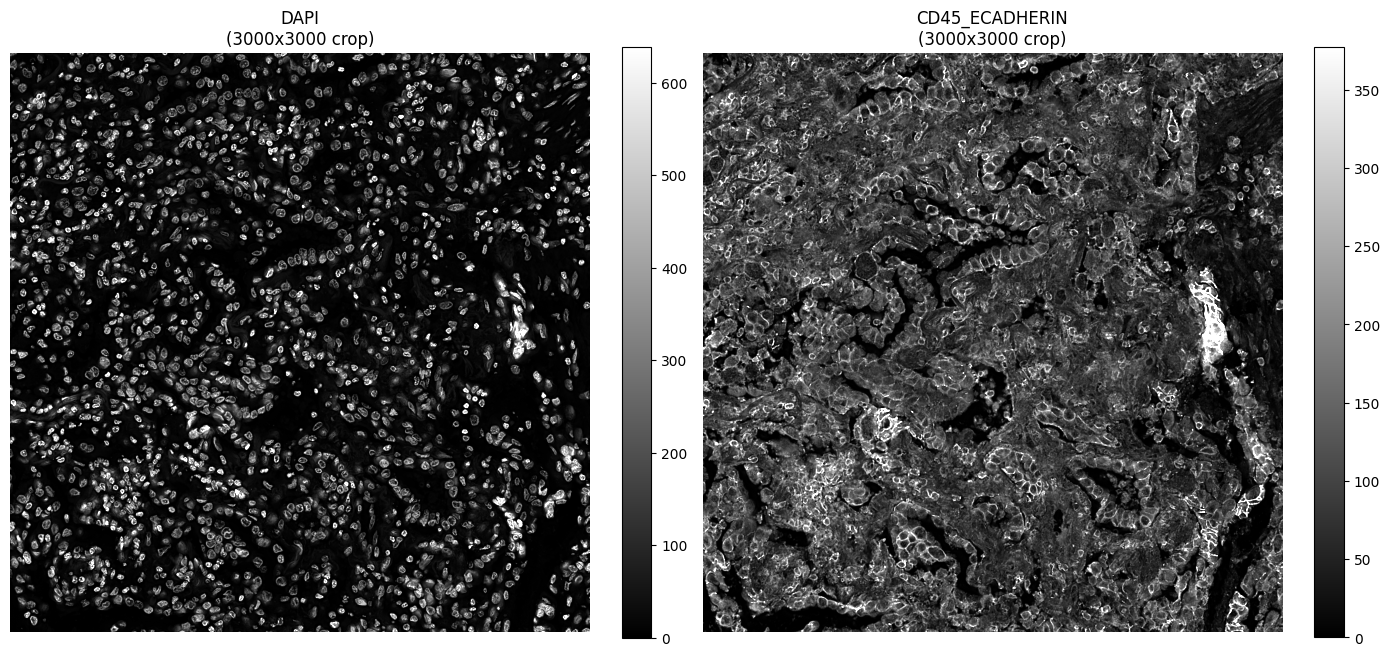

In [7]:
import tifffile
import numpy as np
import matplotlib.pyplot as plt

# Read and verify the saved crops
crop_dir = "test_images"

channels = ['dapi', 'cd45_ecadherin']

print("Verifying saved crops...")
print("="*60)

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

for idx, channel_name in enumerate(channels):
    crop_path = f"{crop_dir}/{channel_name}_crop_3000x3000.ome.tif"
    
    print(f"\n{channel_name.upper()}:")
    
    with tifffile.TiffFile(crop_path) as tif:
        crop = tif.asarray()
        
        print(f"  ✅ Shape: {crop.shape}")
        print(f"  ✅ Dtype: {crop.dtype}")
        print(f"  ✅ Min: {np.min(crop)}")
        print(f"  ✅ Max: {np.max(crop)}")
        print(f"  ✅ Mean: {np.mean(crop):.2f}")
        print(f"  ✅ Median: {np.median(crop):.2f}")
    
    # Visualize with percentile-based contrast
    vmin, vmax = np.percentile(crop, [1, 99])
    
    ax = axes[idx]
    im = ax.imshow(crop, cmap='gray', vmin=vmin, vmax=vmax)
    ax.set_title(f'{channel_name.upper()}\n(3000x3000 crop)', fontsize=12)
    ax.axis('off')
    plt.colorbar(im, ax=ax, fraction=0.046)

plt.tight_layout()
plt.savefig(f'{crop_dir}/verification_both_channels.png', dpi=150, bbox_inches='tight')
print(f"\n✅ Saved visualization: {crop_dir}/verification_both_channels.png")

print("\n" + "="*60)
print("VERIFICATION COMPLETE")
print("="*60)
print("Both channel crops are ready for use!")

In [8]:
import tifffile
import numpy as np

# Read both crops
crop_dir = "test_images"

print("Combining channels into single file...")
print("="*60)

# Read DAPI
dapi_path = f"{crop_dir}/dapi_crop_10000x10000.ome.tif"
with tifffile.TiffFile(dapi_path) as tif:
    dapi = tif.asarray()
    print(f"DAPI loaded: {dapi.shape}, dtype={dapi.dtype}")

# Read CD45/E-cadherin
cd45_path = f"{crop_dir}/cd45_ecadherin_crop_3000x3000.ome.tif"
with tifffile.TiffFile(cd45_path) as tif:
    cd45_ecadherin = tif.asarray()
    print(f"CD45/E-cadherin loaded: {cd45_ecadherin.shape}, dtype={cd45_ecadherin.dtype}")

# Stack into 2-channel image: shape will be (2, 3000, 3000)
combined = np.stack([dapi, cd45_ecadherin], axis=0)
print(f"\nCombined shape: {combined.shape}")
print(f"  Channel 0 (DAPI): min={np.min(combined[0])}, max={np.max(combined[0])}, mean={np.mean(combined[0]):.2f}")
print(f"  Channel 1 (CD45/E-cad): min={np.min(combined[1])}, max={np.max(combined[1])}, mean={np.mean(combined[1]):.2f}")

# Save as 2-channel OME-TIFF
output_path = f"{crop_dir}/combined_2channel_crop_3000x3000.ome.tif"
tifffile.imwrite(
    output_path,
    combined,
    photometric='minisblack',
    metadata={'axes': 'CYX'}
)

print(f"\n✅ Saved combined file: {output_path}")
print(f"   Shape: {combined.shape}")
print(f"   Dtype: {combined.dtype}")
print(f"   Size: {combined.nbytes / (1024**2):.2f} MB")

# Verify we can read it back
print("\nVerifying combined file...")
with tifffile.TiffFile(output_path) as tif:
    verify = tif.asarray()
    print(f"✅ Read back successfully: {verify.shape}")
    print(f"   Channels match: {np.array_equal(verify[0], dapi) and np.array_equal(verify[1], cd45_ecadherin)}")

print("\n" + "="*60)
print("DONE!")
print("="*60)
print(f"Combined 2-channel file ready: {output_path}")
print("  • Channel 0: DAPI")
print("  • Channel 1: CD45/E-cadherin")

Combining channels into single file...
DAPI loaded: (3000, 3000), dtype=uint16
CD45/E-cadherin loaded: (3000, 3000), dtype=uint16

Combined shape: (2, 3000, 3000)
  Channel 0 (DAPI): min=0, max=1662, mean=81.84
  Channel 1 (CD45/E-cad): min=0, max=1929, mean=95.90

✅ Saved combined file: test_images/combined_2channel_crop_3000x3000.ome.tif
   Shape: (2, 3000, 3000)
   Dtype: uint16
   Size: 34.33 MB

Verifying combined file...
✅ Read back successfully: (2, 3000, 3000)
   Channels match: True

DONE!
Combined 2-channel file ready: test_images/combined_2channel_crop_3000x3000.ome.tif
  • Channel 0: DAPI
  • Channel 1: CD45/E-cadherin


## Flex 

In [9]:
import torch
from vitaminp import VitaminPFlex
from vitaminp.inference import ChannelConfig, WSIPredictor
# Setup model
device = 'cuda'
model = VitaminPFlex(model_size='large').to(device)
model.load_state_dict(torch.load("checkpoints/vitamin_p_flex_large_fold21_best.pth", map_location=device))
model.eval()

/usr/local/lib/python3.11/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✓ VitaminPFlex initialized with large backbone
  Architecture: Shared Encoder → 4 Separate Decoders
  Embed dim: 1024 | Decoder dims: [1024, 512, 256, 128]


VitaminPFlex(
  (backbone): DINOv2Backbone(
    (dinov2): VisionTransformer(
      (patch_embed): PatchEmbed(
        (proj): Conv2d(3, 1024, kernel_size=(14, 14), stride=(14, 14))
        (norm): Identity()
      )
      (pos_drop): Dropout(p=0.0, inplace=False)
      (patch_drop): Identity()
      (norm_pre): Identity()
      (blocks): Sequential(
        (0): Block(
          (norm1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (attn): Attention(
            (qkv): Linear(in_features=1024, out_features=3072, bias=True)
            (q_norm): Identity()
            (k_norm): Identity()
            (attn_drop): Dropout(p=0.0, inplace=False)
            (norm): Identity()
            (proj): Linear(in_features=1024, out_features=1024, bias=True)
            (proj_drop): Dropout(p=0.0, inplace=False)
          )
          (ls1): LayerScale()
          (drop_path1): Identity()
          (norm2): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (mlp): M

In [10]:
# Create channel config for Xenium data
config = ChannelConfig(
    nuclear_channel=0,           # Channel 0: DAPI
    membrane_channel=[1],        # Channel 1: CD45/E-cadherin
    membrane_combination='max',  # Not really needed for single membrane channel
    channel_names={0: 'DAPI', 1: 'CD45_Ecadherin'}
)

print("\nChannel configuration:")
print(f"  Nuclear channel: 0 (DAPI)")
print(f"  Membrane channel: 1 (CD45/E-cadherin)")

# Create predictor
predictor = WSIPredictor(
    model=model,
    device=device,
    patch_size=512,
    overlap=64,
    target_mpp=0.2125,          # Xenium pixel size from your original code
    magnification=40,
    mif_channel_config=config
)

print("\nPredictor settings:")
print(f"  Patch size: 512")
print(f"  Overlap: 64")
print(f"  Target MPP: 0.2125 μm/pixel")
print(f"  Magnification: 40x")

# Run inference on combined 2-channel crop
input_path = 'test_images/combined_2channel_crop_3000x3000.ome.tif'

print(f"\n{'='*60}")
print("RUNNING INFERENCE...")
print(f"{'='*60}")
print(f"Input: {input_path}")

results = predictor.predict(
    wsi_path=input_path,
    output_dir='results_new',
    branch='mif_cell',              # Use cell branch for whole cells
    filter_tissue=False,            # Process entire crop
    clean_overlaps=True,            # Clean boundary artifacts
    save_geojson=True,              # Save GeoJSON for visualization
    detection_threshold=0.3,        # Adjust for sensitivity
    min_area_um=10.0,               # Filter small artifacts (10 μm²)
    mpp_override=0.263,            # Use Xenium pixel size
)

print(f"\n{'='*60}")
print("RESULTS")
print(f"{'='*60}")
print(f"✅ Found {results['num_detections']} cells in {results['processing_time']:.2f}s")
print(f"   Output saved to: {results['output_dir']}")

# Check cell statistics
if results['num_detections'] > 0:
    first_cell = list(results['instances'].values())[0]
    if 'area_um' in first_cell:
        print(f"   First cell area: {first_cell['area_um']:.2f} μm² ({first_cell['area_pixels']:.0f} pixels²)")
    
    # Calculate some statistics
    import numpy as np
    areas_um = [inst['area_um'] for inst in results['instances'].values() if 'area_um' in inst]
    if areas_um:
        print(f"\n   Cell area statistics:")
        print(f"     Mean: {np.mean(areas_um):.2f} μm²")
        print(f"     Median: {np.median(areas_um):.2f} μm²")
        print(f"     Min: {np.min(areas_um):.2f} μm²")
        print(f"     Max: {np.max(areas_um):.2f} μm²")
    
    print(f"\n   Output files:")
    print(f"     • Cell instances: {output_dir}/instances.geojson")
    print(f"     • Results pickle: {output_dir}/results.pkl")

print(f"\n{'='*60}")
print("INFERENCE COMPLETE!")
print(f"{'='*60}")

2026-01-28 17:15:38 - WSIPredictor - INFO - WSIPredictor initialized:
2026-01-28 17:15:38 - WSIPredictor - INFO -   Device: cuda
2026-01-28 17:15:38 - WSIPredictor - INFO -   Model type: VitaminPFlex (single-modality)
2026-01-28 17:15:38 - WSIPredictor - INFO -   Patch size: 512
2026-01-28 17:15:38 - WSIPredictor - INFO -   Overlap: 64
2026-01-28 17:15:38 - WSIPredictor - INFO -   Magnification: 40
2026-01-28 17:15:38 - WSIPredictor - INFO -   MIF channels: Nuclear: DAPI, Membrane: max(CD45_Ecadherin)
2026-01-28 17:15:38 - WSIPredictor - INFO -    Manual MPP override: 0.2630 μm/px
2026-01-28 17:15:38 - WSIPredictor - INFO - 🔍 Resolution matching:
2026-01-28 17:15:38 - WSIPredictor - INFO -    WSI MPP: 0.2630 μm/px
2026-01-28 17:15:38 - WSIPredictor - INFO -    Model training MPP: 0.2630 μm/px
2026-01-28 17:15:38 - WSIPredictor - INFO -    Scale factor: 1.00x
2026-01-28 17:15:38 - WSIPredictor - INFO -    Min area filter: 10.0 μm² = 145 pixels²
2026-01-28 17:15:38 - WSIPredictor - INFO 


Channel configuration:
  Nuclear channel: 0 (DAPI)
  Membrane channel: 1 (CD45/E-cadherin)

Predictor settings:
  Patch size: 512
  Overlap: 64
  Target MPP: 0.2125 μm/pixel
  Magnification: 40x

RUNNING INFERENCE...
Input: test_images/combined_2channel_crop_3000x3000.ome.tif
Output: shape=(2, 3000, 3000), dtype=float32, range=[0.000, 0.029]
   Scanning 7x7 tile grid...


Processing tiles: 100%|██████████| 49/49 [00:11<00:00,  4.22it/s]
2026-01-28 17:15:50 - WSIPredictor - INFO -    ✓ Extracted 5277 instances from tiles (before cleaning)
2026-01-28 17:15:50 - WSIPredictor - INFO -    🔍 DEBUG: Tile configuration:
2026-01-28 17:15:50 - WSIPredictor - INFO -       - Tile size: 512px
2026-01-28 17:15:50 - WSIPredictor - INFO -       - Overlap: 64px
2026-01-28 17:15:50 - WSIPredictor - INFO -       - Grid: 7x7 tiles
2026-01-28 17:15:50 - WSIPredictor - INFO -    🔍 DEBUG: Cells near tile boundaries (within 64px): 2383
2026-01-28 17:15:50 - WSIPredictor - INFO -    🔍 DEBUG: Potential overlap rate: 45.2%
2026-01-28 17:15:50 - WSIPredictor - INFO - 🧹 Cleaning overlapping instances at tile boundaries...
2026-01-28 17:15:50 - WSIPredictor - INFO -    🔍 DEBUG: Total cells before cleaning: 5277
2026-01-28 17:15:50 - WSIPredictor - INFO -    🔍 DEBUG: Edge cells found: 2293
2026-01-28 17:15:50 - WSIPredictor - INFO -    🔍 DEBUG: Will clean ALL instances (not just edge


RESULTS
✅ Found 3481 cells in 19.17s
   Output saved to: results_new

   Output files:
     • Cell instances: test_images/instances.geojson
     • Results pickle: test_images/results.pkl

INFERENCE COMPLETE!


In [13]:
import tifffile
import numpy as np
import os
import tempfile

# Set paths to original Xenium data
data_dir = "/rsrch9/home/plm/idso_fa1_pathology/TIER1/paul-xenium/Lung_Anthracosis/output-XETG00522__0057986__Region_1__20251203__234028"
morphology_focus_dir = f"{data_dir}/morphology_focus"

print("="*60)
print("READING ORIGINAL XENIUM CHANNELS")
print("="*60)

# Read DAPI channel
dapi_path = f"{morphology_focus_dir}/ch0000_dapi.ome.tif"
print(f"\nReading DAPI: {dapi_path}")
with tifffile.TiffFile(dapi_path) as tif:
    dapi = tif.pages[0].asarray()
    print(f"  ✅ DAPI loaded: {dapi.shape}, dtype={dapi.dtype}")

# Read CD45/E-cadherin channel
cd45_path = f"{morphology_focus_dir}/ch0001_atp1a1_cd45_e-cadherin.ome.tif"
print(f"Reading CD45/E-cadherin: {cd45_path}")
with tifffile.TiffFile(cd45_path) as tif:
    cd45_ecadherin = tif.pages[0].asarray()
    print(f"  ✅ CD45/E-cadherin loaded: {cd45_ecadherin.shape}, dtype={cd45_ecadherin.dtype}")

# Stack into 2-channel image
combined = np.stack([dapi, cd45_ecadherin], axis=0)
print(f"\n✅ Combined shape: {combined.shape} (channels, height, width)")

# Save temporarily for WSIPredictor (it expects a file path)
temp_dir = "temp_inference"
os.makedirs(temp_dir, exist_ok=True)
temp_path = f"{temp_dir}/xenium_full_2channel.ome.tif"

print(f"\nSaving temporary combined file for inference...")
tifffile.imwrite(
    temp_path,
    combined,
    photometric='minisblack',
    metadata={'axes': 'CYX'}
)
print(f"  ✅ Saved to: {temp_path}")

# Now run inference with the original full-size image
print("\n" + "="*60)
print("RUNNING INFERENCE ON FULL XENIUM IMAGE")
print("="*60)

# Create channel config for Xenium data
config = ChannelConfig(
    nuclear_channel=0,           # Channel 0: DAPI
    membrane_channel=[1],        # Channel 1: CD45/E-cadherin
    membrane_combination='max',
    channel_names={0: 'DAPI', 1: 'CD45_Ecadherin'}
)

print("\nChannel configuration:")
print(f"  Nuclear channel: 0 (DAPI)")
print(f"  Membrane channel: 1 (CD45/E-cadherin)")

# Create predictor
predictor = WSIPredictor(
    model=model,
    device=device,
    patch_size=512,
    overlap=64,
    target_mpp=0.2125,          # Xenium pixel size
    magnification=40,
    mif_channel_config=config
)

print("\nPredictor settings:")
print(f"  Patch size: 512")
print(f"  Overlap: 64")
print(f"  Target MPP: 0.2125 μm/pixel")
print(f"  Magnification: 40x")

# Run inference
input_path = temp_path
print(f"\n{'='*60}")
print("RUNNING INFERENCE...")
print(f"{'='*60}")
print(f"Input: {input_path}")
print(f"Size: {combined.shape[1]} x {combined.shape[2]} pixels")
print(f"Size in microns: {combined.shape[1]*0.2125:.1f} x {combined.shape[2]*0.2125:.1f} μm")

results = predictor.predict(
    wsi_path=input_path,
    output_dir='results_new',
    branch='mif_cell',              # Use cell branch for whole cells
    filter_tissue=False,            # Process entire crop
    clean_overlaps=True,            # Clean boundary artifacts
    save_geojson=True,              # Save GeoJSON for visualization
    detection_threshold=0.3,        # Adjust for sensitivity
    min_area_um=10.0,               # Filter small artifacts (10 μm²)
    mpp_override=0.263,            # Use Xenium pixel size
)

print(f"\n{'='*60}")
print("RESULTS")
print(f"{'='*60}")
print(f"✅ Found {results['num_detections']} cells in {results['processing_time']:.2f}s")
print(f"   Output saved to: {results['output_dir']}")

# Check cell statistics
if results['num_detections'] > 0:
    first_cell = list(results['instances'].values())[0]
    if 'area_um' in first_cell:
        print(f"   First cell area: {first_cell['area_um']:.2f} μm² ({first_cell['area_pixels']:.0f} pixels²)")
    
    # Calculate some statistics
    import numpy as np
    areas_um = [inst['area_um'] for inst in results['instances'].values() if 'area_um' in inst]
    if areas_um:
        print(f"\n   Cell area statistics:")
        print(f"     Mean: {np.mean(areas_um):.2f} μm²")
        print(f"     Median: {np.median(areas_um):.2f} μm²")
        print(f"     Min: {np.min(areas_um):.2f} μm²")
        print(f"     Max: {np.max(areas_um):.2f} μm²")
    
    print(f"\n   Output files:")
    print(f"     • Cell instances: results_new/instances.geojson")
    print(f"     • Results pickle: results_new/results.pkl")

print(f"\n{'='*60}")
print("INFERENCE COMPLETE!")
print(f"{'='*60}")

READING ORIGINAL XENIUM CHANNELS

Reading DAPI: /rsrch9/home/plm/idso_fa1_pathology/TIER1/paul-xenium/Lung_Anthracosis/output-XETG00522__0057986__Region_1__20251203__234028/morphology_focus/ch0000_dapi.ome.tif
  ✅ DAPI loaded: (112134, 54229), dtype=uint16
Reading CD45/E-cadherin: /rsrch9/home/plm/idso_fa1_pathology/TIER1/paul-xenium/Lung_Anthracosis/output-XETG00522__0057986__Region_1__20251203__234028/morphology_focus/ch0001_atp1a1_cd45_e-cadherin.ome.tif
  ✅ CD45/E-cadherin loaded: (112134, 54229), dtype=uint16

✅ Combined shape: (2, 112134, 54229) (channels, height, width)

Saving temporary combined file for inference...


2026-01-26 21:42:39 - WSIPredictor - INFO - WSIPredictor initialized:
2026-01-26 21:42:39 - WSIPredictor - INFO -   Device: cuda
2026-01-26 21:42:39 - WSIPredictor - INFO -   Model type: VitaminPFlex (single-modality)
2026-01-26 21:42:39 - WSIPredictor - INFO -   Patch size: 512
2026-01-26 21:42:39 - WSIPredictor - INFO -   Overlap: 64
2026-01-26 21:42:39 - WSIPredictor - INFO -   Magnification: 40
2026-01-26 21:42:39 - WSIPredictor - INFO -   MIF channels: Nuclear: DAPI, Membrane: max(CD45_Ecadherin)
2026-01-26 21:42:39 - WSIPredictor - INFO -    Manual MPP override: 0.2630 μm/px
2026-01-26 21:42:39 - WSIPredictor - INFO - 🔍 Resolution matching:
2026-01-26 21:42:39 - WSIPredictor - INFO -    WSI MPP: 0.2630 μm/px
2026-01-26 21:42:39 - WSIPredictor - INFO -    Model training MPP: 0.2630 μm/px
2026-01-26 21:42:39 - WSIPredictor - INFO -    Scale factor: 1.00x
2026-01-26 21:42:39 - WSIPredictor - INFO -    Min area filter: 10.0 μm² = 145 pixels²
2026-01-26 21:42:39 - WSIPredictor - INFO 

  ✅ Saved to: temp_inference/xenium_full_2channel.ome.tif

RUNNING INFERENCE ON FULL XENIUM IMAGE

Channel configuration:
  Nuclear channel: 0 (DAPI)
  Membrane channel: 1 (CD45/E-cadherin)

Predictor settings:
  Patch size: 512
  Overlap: 64
  Target MPP: 0.2125 μm/pixel
  Magnification: 40x

RUNNING INFERENCE...
Input: temp_inference/xenium_full_2channel.ome.tif
Size: 112134 x 54229 pixels
Size in microns: 23828.5 x 11523.7 μm


2026-01-26 21:45:59 - WSIPredictor - INFO -    ✓ MIF Size: 112134x54229 pixels, 2 channels
2026-01-26 21:45:59 - WSIPredictor - INFO - 📐 Extracting tiles...
2026-01-26 21:45:59 - WSIPredictor - INFO -    ✓ Created 30371 tiles (251x121 grid)
2026-01-26 21:45:59 - WSIPredictor - INFO - 🧠 Running predictions and extracting instances on mif_cell...


Output: shape=(2, 112134, 54229), dtype=float32, range=[0.000, 0.070]
   Scanning 251x121 tile grid...


Processing tiles: 100%|██████████| 30371/30371 [1:13:16<00:00,  6.91it/s]  
2026-01-26 22:59:16 - WSIPredictor - INFO -    ✓ Extracted 1951016 instances from tiles (before cleaning)
2026-01-26 22:59:16 - WSIPredictor - INFO -    🔍 DEBUG: Tile configuration:
2026-01-26 22:59:16 - WSIPredictor - INFO -       - Tile size: 512px
2026-01-26 22:59:16 - WSIPredictor - INFO -       - Overlap: 64px
2026-01-26 22:59:16 - WSIPredictor - INFO -       - Grid: 251x121 tiles
2026-01-26 22:59:20 - WSIPredictor - INFO -    🔍 DEBUG: Cells near tile boundaries (within 64px): 852470
2026-01-26 22:59:20 - WSIPredictor - INFO -    🔍 DEBUG: Potential overlap rate: 43.7%
2026-01-26 22:59:44 - WSIPredictor - INFO - 🧹 Cleaning overlapping instances at tile boundaries...
2026-01-26 22:59:45 - WSIPredictor - INFO -    🔍 DEBUG: Total cells before cleaning: 1951016
2026-01-26 22:59:45 - WSIPredictor - INFO -    🔍 DEBUG: Edge cells found: 817890
2026-01-26 22:59:45 - WSIPredictor - INFO -    🔍 DEBUG: Will clean ALL 


RESULTS
✅ Found 1404760 cells in 8864.36s
   Output saved to: results_new

   Output files:
     • Cell instances: results_new/instances.geojson
     • Results pickle: results_new/results.pkl

INFERENCE COMPLETE!


In [11]:
import json
import numpy as np
import multiprocessing as mp
from functools import partial
import time

def flatten_coords(coords, result_list):
    """Flatten nested coordinate structures"""
    if isinstance(coords[0], (int, float)):
        result_list.append(coords)
    else:
        for c in coords:
            flatten_coords(c, result_list)

def unflatten_coords(flat_coords, original_coords, idx_counter):
    """Reconstruct nested structure from flattened array"""
    if isinstance(original_coords[0], (int, float)):
        result = flat_coords[idx_counter[0]]
        idx_counter[0] += 1
        return result
    return [unflatten_coords(flat_coords, c, idx_counter) for c in original_coords]

def process_feature_batch_numpy(features_batch, precision):
    """Process features using numpy for faster computation"""
    for feature in features_batch:
        if 'geometry' in feature and feature['geometry']:
            if 'coordinates' in feature['geometry']:
                coords = feature['geometry']['coordinates']
                
                # Flatten coordinates
                flat = []
                flatten_coords(coords, flat)
                
                # Convert to numpy, round, convert back
                arr = np.array(flat, dtype=np.float64)
                arr = np.round(arr, decimals=precision)
                
                # Reconstruct structure
                idx_counter = [0]
                feature['geometry']['coordinates'] = unflatten_coords(
                    arr.tolist(), coords, idx_counter
                )
    
    return features_batch

def simplify_geojson_fast(input_path, output_path, precision=4, n_workers=256):
    """Ultra-fast parallel GeoJSON simplification"""
    start_time = time.time()
    
    print(f"Using {n_workers} CPU cores with NumPy acceleration")
    print(f"Reading {input_path}...")
    
    with open(input_path, 'r') as f:
        data = json.load(f)
    
    features = data.get('features', [])
    n_features = len(features)
    print(f"Processing {n_features} features...")
    
    # Optimize batch size for your system
    batch_size = max(1, n_features // (n_workers * 2))
    batches = [features[i:i + batch_size] for i in range(0, n_features, batch_size)]
    
    print(f"Split into {len(batches)} batches")
    
    with mp.Pool(processes=n_workers) as pool:
        process_func = partial(process_feature_batch_numpy, precision=precision)
        processed_batches = []
        
        for i, result in enumerate(pool.imap_unordered(process_func, batches, chunksize=1)):
            processed_batches.append(result)
            if (i + 1) % 50 == 0 or (i + 1) == len(batches):
                progress = (i + 1) / len(batches) * 100
                elapsed_so_far = time.time() - start_time
                print(f"Progress: {progress:.1f}% - {elapsed_so_far:.1f}s elapsed")
    
    data['features'] = [feature for batch in processed_batches for feature in batch]
    
    print(f"Writing to {output_path}...")
    with open(output_path, 'w') as f:
        json.dump(data, f, separators=(',', ':'))
    
    elapsed = time.time() - start_time
    print(f"Done in {elapsed:.1f} seconds!")
    
    import os
    original_size = os.path.getsize(input_path) / (1024**3)
    new_size = os.path.getsize(output_path) / (1024**3)
    reduction = (1 - new_size/original_size) * 100
    
    print(f"\nOriginal size: {original_size:.2f} GB")
    print(f"New size: {new_size:.2f} GB")
    print(f"Reduction: {reduction:.1f}%")
    print(f"Processing speed: {n_features/elapsed:.0f} features/second")

# Run
input_file = "results_new/cell_segmentation_wsi.geojson"
output_file = "results_new/cell_segmentation_wsi_simplified.geojson"

simplify_geojson_fast(input_file, output_file, precision=4, n_workers=256)

Using 256 CPU cores with NumPy acceleration
Reading results_new/cell_segmentation_wsi.geojson...
Processing 1404760 features...
Split into 513 batches
Progress: 9.7% - 570.7s elapsed
Progress: 19.5% - 575.7s elapsed
Progress: 29.2% - 618.9s elapsed
Progress: 39.0% - 624.0s elapsed
Progress: 48.7% - 629.9s elapsed
Progress: 58.5% - 674.7s elapsed
Progress: 68.2% - 677.4s elapsed
Progress: 78.0% - 680.0s elapsed
Progress: 87.7% - 682.5s elapsed
Progress: 97.5% - 734.9s elapsed
Progress: 100.0% - 735.6s elapsed
Writing to results_new/cell_segmentation_wsi_simplified.geojson...
Done in 1036.4 seconds!

Original size: 6.90 GB
New size: 1.82 GB
Reduction: 73.7%
Processing speed: 1355 features/second


In [13]:
import json
import numpy as np
import multiprocessing as mp
from functools import partial
import time

def simplify_coords_recursive(coords, precision):
    """Recursively simplify coordinates while preserving structure"""
    if isinstance(coords[0], (int, float)):
        # Base case: this is a coordinate pair [x, y]
        return [round(coords[0], precision), round(coords[1], precision)]
    else:
        # Recursive case: list of coordinate structures
        return [simplify_coords_recursive(c, precision) for c in coords]

def remove_duplicate_points(coords, tolerance=1.0):
    """Remove consecutive duplicate points from a coordinate ring"""
    if not coords or len(coords) < 2:
        return coords
    
    if isinstance(coords[0], (int, float)):
        # Single coordinate pair
        return coords
    
    # List of coordinate pairs
    if isinstance(coords[0][0], (int, float)):
        # This is a ring of coordinates [[x,y], [x,y], ...]
        simplified = [coords[0]]
        for i in range(1, len(coords)):
            dist = np.sqrt((coords[i][0] - simplified[-1][0])**2 + 
                          (coords[i][1] - simplified[-1][1])**2)
            if dist > tolerance:
                simplified.append(coords[i])
        
        # Keep at least 4 points for a valid polygon (including closing point)
        if len(simplified) < 4:
            return coords
        return simplified
    else:
        # Nested structure, recurse
        return [remove_duplicate_points(c, tolerance) for c in coords]

def process_feature_batch_aggressive(features_batch, precision, simplify_geometry=True, tolerance=1.0):
    """Process features with aggressive simplification"""
    for feature in features_batch:
        if 'geometry' in feature and feature['geometry']:
            if 'coordinates' in feature['geometry']:
                coords = feature['geometry']['coordinates']
                
                # Step 1: Remove duplicate/close points if requested
                if simplify_geometry:
                    coords = remove_duplicate_points(coords, tolerance)
                
                # Step 2: Round coordinates
                coords = simplify_coords_recursive(coords, precision)
                
                feature['geometry']['coordinates'] = coords
    
    return features_batch

def simplify_geojson_aggressive(input_path, output_path, precision=3, 
                                simplify_geometry=True, tolerance=1.0,
                                compress_output=False, n_workers=256):
    """
    Ultra-aggressive GeoJSON simplification
    
    Args:
        precision: Decimal places (lower = smaller file)
                  2 = ~1km accuracy, 3 = ~111m, 4 = ~11m
        simplify_geometry: Remove close points in polygons
        tolerance: Minimum distance between points (pixels)
        compress_output: Save as .geojson.gz (gzip compressed)
    """
    start_time = time.time()
    
    print("=" * 70)
    print("AGGRESSIVE GeoJSON Simplification")
    print("=" * 70)
    print(f"Precision: {precision} decimals")
    print(f"Geometry simplification: {simplify_geometry} (tolerance={tolerance})")
    print(f"Gzip compression: {compress_output}")
    print(f"Workers: {n_workers}")
    print("=" * 70)
    
    print(f"\nReading {input_path}...")
    with open(input_path, 'r') as f:
        data = json.load(f)
    
    features = data.get('features', [])
    n_features = len(features)
    print(f"Processing {n_features:,} features...")
    
    batch_size = max(1, n_features // (n_workers * 2))
    batches = [features[i:i + batch_size] for i in range(0, n_features, batch_size)]
    
    print(f"Split into {len(batches):,} batches\n")
    
    with mp.Pool(processes=n_workers) as pool:
        process_func = partial(process_feature_batch_aggressive, 
                              precision=precision,
                              simplify_geometry=simplify_geometry,
                              tolerance=tolerance)
        processed_batches = []
        
        last_update = time.time()
        for i, result in enumerate(pool.imap_unordered(process_func, batches, chunksize=1)):
            processed_batches.append(result)
            
            current_time = time.time()
            if current_time - last_update >= 1.0 or (i + 1) == len(batches):
                progress = (i + 1) / len(batches) * 100
                elapsed = current_time - start_time
                features_done = (i + 1) * batch_size
                speed = features_done / elapsed if elapsed > 0 else 0
                print(f"Progress: {progress:5.1f}% | {i+1:,}/{len(batches):,} batches | {speed:,.0f} feat/s", 
                      end='\r', flush=True)
                last_update = current_time
    
    print("\n\nReconstructing...")
    data['features'] = [feature for batch in processed_batches for feature in batch]
    
    # Write output
    print(f"Writing to {output_path}...")
    
    if compress_output:
        import gzip
        if not output_path.endswith('.gz'):
            output_path = output_path + '.gz'
        with gzip.open(output_path, 'wt', encoding='utf-8') as f:
            json.dump(data, f, separators=(',', ':'))
    else:
        with open(output_path, 'w') as f:
            json.dump(data, f, separators=(',', ':'))
    
    elapsed = time.time() - start_time
    
    # Summary
    import os
    original_size = os.path.getsize(input_path) / (1024**3)
    new_size = os.path.getsize(output_path) / (1024**3)
    reduction = (1 - new_size/original_size) * 100
    
    print("\n" + "=" * 70)
    print("RESULTS")
    print("=" * 70)
    print(f"Original:  {original_size:.2f} GB")
    print(f"New:       {new_size:.2f} GB")
    print(f"Reduction: {reduction:.1f}%")
    print(f"Saved:     {original_size - new_size:.2f} GB")
    print(f"Time:      {elapsed:.1f}s ({n_features/elapsed:,.0f} feat/s)")
    print("=" * 70)

# Run with moderate simplification
simplify_geojson_aggressive(
    "results_new/cell_segmentation_wsi_simplified.geojson",
    "results_new/cell_segmentation_wsi_simplified_more.geojson",
    precision=3,              # 3 decimals = ~111m accuracy
    simplify_geometry=True,   # Remove close points
    tolerance=1.0,            # Minimum 1 pixel distance
    compress_output=False,    # Plain JSON
    n_workers=256
)

AGGRESSIVE GeoJSON Simplification
Precision: 3 decimals
Geometry simplification: True (tolerance=1.0)
Gzip compression: False
Workers: 256

Reading results_new/cell_segmentation_wsi_simplified.geojson...
Processing 1,404,760 features...
Split into 513 batches

Progress: 100.0% | 513/513 batches | 3,070 feat/s

Reconstructing...
Writing to results_new/cell_segmentation_wsi_simplified_more.geojson...

RESULTS
Original:  1.82 GB
New:       1.82 GB
Reduction: 0.0%
Saved:     0.00 GB
Time:      665.2s (2,112 feat/s)


In [15]:
import json
import tifffile
import numpy as np
import os

# ============================================================================
# PARAMETERS
# ============================================================================
data_dir = "/rsrch9/home/plm/idso_fa1_pathology/TIER1/paul-xenium/Lung_Anthracosis/output-XETG00522__0057986__Region_1__20251203__234028"
morphology_focus_dir = f"{data_dir}/morphology_focus"

# Path to full GeoJSON
input_geojson = "results_new/xenium_cell_boundaries_FULL.geojson"
output_geojson = "results_new/xenium_cell_boundaries_10k_crop.geojson"

# Crop parameters (same as your image extraction)
crop_size = 10000

# ============================================================================
# STEP 1: Get the exact crop coordinates from the reference image
# ============================================================================
print("Getting crop coordinates from reference image...")
reference_channel = f"{morphology_focus_dir}/ch0000_dapi.ome.tif"

with tifffile.TiffFile(reference_channel) as tif:
    page = tif.pages[0]
    height, width = page.shape[:2]
    
    # Calculate center crop coordinates (same logic as your extraction)
    center_y = height // 2
    center_x = width // 2
    
    y_start = center_y - crop_size // 2
    y_end = y_start + crop_size
    x_start = center_x - crop_size // 2
    x_end = x_start + crop_size

print(f"Image dimensions: {height} x {width}")
print(f"Crop region (pixels):")
print(f"  X: [{x_start}, {x_end}]")
print(f"  Y: [{y_start}, {y_end}]")

# ============================================================================
# STEP 2: Load and filter GeoJSON
# ============================================================================
print(f"\nLoading GeoJSON: {input_geojson}")
with open(input_geojson, 'r') as f:
    data = json.load(f)

total_features = len(data.get('features', []))
print(f"Total features in original file: {total_features:,}")

# ============================================================================
# STEP 3: Filter features within the crop region
# ============================================================================
print("\nFiltering features within crop region...")

def is_polygon_in_region(coordinates, x_min, x_max, y_min, y_max):
    """
    Check if any vertex of the polygon is within the region.
    For cell boundaries, if any part is in the region, we keep it.
    """
    # Handle different GeoJSON coordinate structures
    # Polygon: [[[x,y], [x,y], ...]]
    # MultiPolygon: [[[[x,y], [x,y], ...]], [[[x,y], [x,y], ...]]]
    
    def check_ring(ring):
        for coord in ring:
            x, y = coord[0], coord[1]
            if x_min <= x < x_max and y_min <= y < y_max:
                return True
        return False
    
    # Flatten the coordinate structure and check
    if isinstance(coordinates[0][0][0], list):
        # MultiPolygon
        for polygon in coordinates:
            for ring in polygon:
                if check_ring(ring):
                    return True
    else:
        # Polygon
        for ring in coordinates:
            if check_ring(ring):
                return True
    
    return False

filtered_features = []
for feature in data['features']:
    if 'geometry' in feature and feature['geometry']:
        coords = feature['geometry'].get('coordinates')
        if coords:
            if is_polygon_in_region(coords, x_start, x_end, y_start, y_end):
                filtered_features.append(feature)

print(f"Features in crop region: {len(filtered_features):,}")
print(f"Reduction: {(1 - len(filtered_features)/total_features)*100:.1f}%")

# ============================================================================
# STEP 4: Translate coordinates to local crop space (0,0 origin)
# ============================================================================
print("\nTranslating coordinates to local crop space...")

def translate_coordinates(coordinates, x_offset, y_offset):
    """Recursively translate all coordinates"""
    if isinstance(coordinates[0], (int, float)):
        # Base case: [x, y]
        return [coordinates[0] - x_offset, coordinates[1] - y_offset]
    else:
        # Recursive case
        return [translate_coordinates(c, x_offset, y_offset) for c in coordinates]

for feature in filtered_features:
    if 'geometry' in feature and feature['geometry']:
        coords = feature['geometry']['coordinates']
        feature['geometry']['coordinates'] = translate_coordinates(coords, x_start, y_start)

# ============================================================================
# STEP 5: Save cropped GeoJSON
# ============================================================================
output_data = {
    'type': 'FeatureCollection',
    'features': filtered_features,
    'metadata': {
        'original_file': input_geojson,
        'crop_region': {
            'x_start': x_start,
            'x_end': x_end,
            'y_start': y_start,
            'y_end': y_end,
            'width': crop_size,
            'height': crop_size
        },
        'original_feature_count': total_features,
        'cropped_feature_count': len(filtered_features)
    }
}

print(f"\nSaving cropped GeoJSON: {output_geojson}")
with open(output_geojson, 'w') as f:
    json.dump(output_data, f, separators=(',', ':'))

# ============================================================================
# SUMMARY
# ============================================================================
file_size_original = os.path.getsize(input_geojson) / (1024**2)  # MB
file_size_cropped = os.path.getsize(output_geojson) / (1024**2)  # MB

print("\n" + "="*70)
print("EXTRACTION COMPLETE")
print("="*70)
print(f"Crop region: {crop_size} x {crop_size} pixels")
print(f"Position: X[{x_start}:{x_end}], Y[{y_start}:{y_end}]")
print(f"\nFeatures:")
print(f"  Original: {total_features:,}")
print(f"  Cropped:  {len(filtered_features):,}")
print(f"  Reduction: {(1 - len(filtered_features)/total_features)*100:.1f}%")
print(f"\nFile sizes:")
print(f"  Original: {file_size_original:.1f} MB")
print(f"  Cropped:  {file_size_cropped:.1f} MB")
print(f"  Reduction: {(1 - file_size_cropped/file_size_original)*100:.1f}%")
print(f"\nOutput saved to:")
print(f"  {output_geojson}")
print("="*70)

Getting crop coordinates from reference image...
Image dimensions: 112134 x 54229
Crop region (pixels):
  X: [22114, 32114]
  Y: [51067, 61067]

Loading GeoJSON: results_new/xenium_cell_boundaries_FULL.geojson
Total features in original file: 1,110,339

Filtering features within crop region...
Features in crop region: 32,891
Reduction: 97.0%

Translating coordinates to local crop space...

Saving cropped GeoJSON: results_new/xenium_cell_boundaries_10k_crop.geojson

EXTRACTION COMPLETE
Crop region: 10000 x 10000 pixels
Position: X[22114:32114], Y[51067:61067]

Features:
  Original: 1,110,339
  Cropped:  32,891
  Reduction: 97.0%

File sizes:
  Original: 1185.0 MB
  Cropped:  32.4 MB
  Reduction: 97.3%

Output saved to:
  results_new/xenium_cell_boundaries_10k_crop.geojson


## Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.path import Path
import tifffile
import json
from shapely.geometry import Point, Polygon as ShapelyPolygon
from shapely.strtree import STRtree
from sklearn.preprocessing import StandardScaler
import umap
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# CONFIGURATION
# ============================================================================
data_dir = "/rsrch9/home/plm/idso_fa1_pathology/TIER1/paul-xenium/Lung_Anthracosis/output-XETG00522__0057986__Region_1__20251203__234028"
results_dir = "results_new"

# Input files
vitamin_p_geojson = f"{results_dir}/vitamin-p-cell_segmentation_10k.geojson"
xenium_geojson = f"{results_dir}/xenium_cell_boundaries_10k_crop.geojson"
morphology_image = "test_images/combined_2channel_crop_10000x10000.ome.tif"

# Output directory
output_dir = "paper_analysis_results"
import os
os.makedirs(output_dir, exist_ok=True)

# Experiment parameters
pixel_size = 0.2125  # microns per pixel
TRANSCRIPT_SAMPLE_FRACTION = 0.30  # Use 15% of transcripts for speed

print("="*80)
print("VITAMIN-P vs XENIUM: COMPREHENSIVE COMPARISON ANALYSIS")
print("="*80)

# ============================================================================
# STEP 1: LOAD DATA
# ============================================================================
print("\n[STEP 1] Loading data...")

# Load morphology image
print("  Loading morphology image...")
with tifffile.TiffFile(morphology_image) as tif:
    img = tif.asarray()
    if len(img.shape) == 3:
        img = np.max(img, axis=0)
print(f"  Image shape: {img.shape}")

# Load Vitamin-P segmentation
print("  Loading Vitamin-P segmentation...")
with open(vitamin_p_geojson, 'r') as f:
    vitamin_p_data = json.load(f)
vitamin_p_features = vitamin_p_data['features']
print(f"  Vitamin-P cells: {len(vitamin_p_features):,}")

# Load Xenium segmentation
print("  Loading Xenium segmentation...")
with open(xenium_geojson, 'r') as f:
    xenium_data = json.load(f)
xenium_features = xenium_data['features']
print(f"  Xenium cells: {len(xenium_features):,}")

# Load transcripts
print("  Loading transcripts...")
transcripts = pd.read_parquet(f"{data_dir}/transcripts.parquet")

# Get crop coordinates
crop_info = xenium_data['metadata']['crop_region']
x_start = crop_info['x_start']
y_start = crop_info['y_start']
crop_size = crop_info['width']
print(f"  Crop region: X[{x_start}:{x_start+crop_size}], Y[{y_start}:{y_start+crop_size}]")

# Convert and filter transcripts
transcripts['x_pixels'] = transcripts['x_location'] / pixel_size
transcripts['y_pixels'] = transcripts['y_location'] / pixel_size

transcripts_crop = transcripts[
    (transcripts['x_pixels'] >= x_start) & 
    (transcripts['x_pixels'] < x_start + crop_size) &
    (transcripts['y_pixels'] >= y_start) & 
    (transcripts['y_pixels'] < y_start + crop_size)
].copy()

transcripts_crop['x_local'] = transcripts_crop['x_pixels'] - x_start
transcripts_crop['y_local'] = transcripts_crop['y_pixels'] - y_start

print(f"  Total transcripts: {len(transcripts_crop):,}")

# SAMPLE TRANSCRIPTS FOR SPEED
print(f"  Sampling {TRANSCRIPT_SAMPLE_FRACTION*100:.0f}% of transcripts for analysis...")
transcripts_sample = transcripts_crop.sample(frac=TRANSCRIPT_SAMPLE_FRACTION, random_state=42)
print(f"  Sampled transcripts: {len(transcripts_sample):,}")

# ============================================================================
# STEP 2: CREATE SPATIAL INDEX (FAST LOOKUP)
# ============================================================================
print("\n[STEP 2] Building spatial index for fast lookup...")

def get_cell_id(feature):
    """Extract cell ID"""
    if 'properties' in feature:
        return feature['properties'].get('id') or feature['properties'].get('cell_id')
    return feature.get('id')

def build_spatial_index(features):
    """Build STRtree spatial index - both files are in same coordinate space"""
    polygons = []
    cell_ids = []
    
    for feature in features:
        cell_id = get_cell_id(feature)
        if cell_id is None:
            continue
        
        coords = feature['geometry']['coordinates']
        if isinstance(coords[0][0][0], list):
            vertices = coords[0][0]
        else:
            vertices = coords[0]
        
        # Both files are already in the same coordinate space (0-10000)
        # No transformation needed
        
        if len(vertices) > 2:
            poly = ShapelyPolygon(vertices)
            polygons.append(poly)
            cell_ids.append(cell_id)
    
    tree = STRtree(polygons)
    return tree, polygons, cell_ids

print("  Building Vitamin-P spatial index...")
vp_tree, vp_polygons, vp_cell_ids = build_spatial_index(vitamin_p_features)

print("  Building Xenium spatial index...")
xen_tree, xen_polygons, xen_cell_ids = build_spatial_index(xenium_features)

print(f"  Vitamin-P indexed: {len(vp_cell_ids):,} cells")
print(f"  Xenium indexed: {len(xen_cell_ids):,} cells")

# DEBUG: Check coordinate spaces
print("\n  DEBUG: Checking coordinate spaces...")
print(f"  Xenium polygon 0 bounds: {xen_polygons[0].bounds}")
print(f"  Vitamin-P polygon 0 bounds: {vp_polygons[0].bounds}")
print(f"  Sample transcript coords: ({transcripts_sample.iloc[0]['x_local']:.1f}, {transcripts_sample.iloc[0]['y_local']:.1f})")

# ============================================================================
# STEP 3: FAST TRANSCRIPT ASSIGNMENT
# ============================================================================
print("\n[STEP 3] Assigning transcripts to cells (spatial index)...")

def assign_transcripts_fast(transcripts_df, tree, polygons, cell_ids):
    """Fast assignment using spatial index"""
    assignments = []
    
    for _, tx in transcripts_df.iterrows():
        point = Point(tx['x_local'], tx['y_local'])
        
        # Query spatial index for nearby polygons
        candidates = tree.query(point)
        
        # Check actual containment
        assigned_cell = None
        for idx in candidates:
            if polygons[idx].contains(point):
                assigned_cell = cell_ids[idx]
                break
        
        assignments.append(assigned_cell)
    
    return assignments

print("  Assigning to Vitamin-P cells...")
transcripts_sample['vitamin_p_cell'] = assign_transcripts_fast(transcripts_sample, vp_tree, vp_polygons, vp_cell_ids)

print("  Assigning to Xenium cells...")
transcripts_sample['xenium_cell'] = assign_transcripts_fast(transcripts_sample, xen_tree, xen_polygons, xen_cell_ids)

# Calculate assignment rates
vp_assigned = transcripts_sample['vitamin_p_cell'].notna().sum()
xen_assigned = transcripts_sample['xenium_cell'].notna().sum()
total = len(transcripts_sample)

vp_rate = vp_assigned / total * 100
xen_rate = xen_assigned / total * 100

print(f"\n  TRANSCRIPT ASSIGNMENT EFFICIENCY:")
print(f"    Vitamin-P: {vp_assigned:,}/{total:,} ({vp_rate:.2f}%)")
print(f"    Xenium:    {xen_assigned:,}/{total:,} ({xen_rate:.2f}%)")
print(f"    Improvement: {vp_rate - xen_rate:.2f} percentage points")

# ============================================================================
# STEP 4: EXPRESSION MATRICES
# ============================================================================
print("\n[STEP 4] Creating expression matrices...")

def create_expression_matrix(transcripts_df, cell_column):
    assigned = transcripts_df[transcripts_df[cell_column].notna()].copy()
    if len(assigned) == 0:
        return pd.DataFrame()
    counts = assigned.groupby([cell_column, 'feature_name']).size().reset_index(name='count')
    matrix = counts.pivot(index=cell_column, columns='feature_name', values='count').fillna(0)
    return matrix

vp_matrix = create_expression_matrix(transcripts_sample, 'vitamin_p_cell')
xen_matrix = create_expression_matrix(transcripts_sample, 'xenium_cell')

print(f"  Vitamin-P: {vp_matrix.shape[0]:,} cells x {vp_matrix.shape[1]:,} genes")
print(f"  Xenium: {xen_matrix.shape[0]:,} cells x {xen_matrix.shape[1]:,} genes")

if len(vp_matrix) > 0:
    vp_tx_per_cell = vp_matrix.sum(axis=1)
    print(f"  Vitamin-P tx/cell: {vp_tx_per_cell.mean():.1f} ± {vp_tx_per_cell.std():.1f}")
else:
    vp_tx_per_cell = pd.Series()
    print(f"  Vitamin-P tx/cell: N/A")

if len(xen_matrix) > 0:
    xen_tx_per_cell = xen_matrix.sum(axis=1)
    print(f"  Xenium tx/cell: {xen_tx_per_cell.mean():.1f} ± {xen_tx_per_cell.std():.1f}")
else:
    xen_tx_per_cell = pd.Series()
    print(f"  Xenium tx/cell: N/A")

# ============================================================================
# STEP 5: DOUBLET DETECTION (SIMPLIFIED)
# ============================================================================
print("\n[STEP 5] Detecting doublets...")

lineage_markers = {
    'epithelial': ['EPCAM', 'KRT8', 'KRT18', 'KRT19'],
    'immune': ['PTPRC', 'CD45', 'CD3E', 'CD68'],
    'fibroblast': ['COL1A1', 'VIM'],
    'endothelial': ['PECAM1', 'CDH5']
}

def detect_doublets_fast(matrix, lineage_markers, threshold=3):
    if len(matrix) == 0:
        return np.zeros(0, dtype=bool)
    
    lineage_scores = []
    
    for lineage, markers in lineage_markers.items():
        available = [m for m in markers if m in matrix.columns]
        if available:
            lineage_scores.append(matrix[available].sum(axis=1) > threshold)
    
    if lineage_scores:
        doublets = sum(lineage_scores) >= 2
        return doublets.values
    return np.zeros(len(matrix), dtype=bool)

vp_doublets = detect_doublets_fast(vp_matrix, lineage_markers)
xen_doublets = detect_doublets_fast(xen_matrix, lineage_markers)

vp_doublet_rate = vp_doublets.sum() / len(vp_doublets) * 100 if len(vp_doublets) > 0 else 0.0
xen_doublet_rate = xen_doublets.sum() / len(xen_doublets) * 100 if len(xen_doublets) > 0 else 0.0

print(f"  Vitamin-P doublets: {vp_doublets.sum():,} ({vp_doublet_rate:.2f}%)")
print(f"  Xenium doublets: {xen_doublets.sum():,} ({xen_doublet_rate:.2f}%)")
print(f"  Reduction: {xen_doublet_rate - vp_doublet_rate:.2f} pp")

# ============================================================================
# STEP 6: UMAP (SIMPLIFIED)
# ============================================================================
print("\n[STEP 6] Running UMAP...")

def run_umap_fast(matrix, min_tx=20):
    if len(matrix) == 0:
        return None, None
    
    valid = matrix.sum(axis=1) >= min_tx
    mat_filt = matrix[valid]
    
    print(f"    Cells: {mat_filt.shape[0]:,}")
    
    if mat_filt.shape[0] < 50:
        return None, None
    
    # Normalize
    cpm = mat_filt.div(mat_filt.sum(axis=1), axis=0) * 1e6
    log_cpm = np.log1p(cpm)
    
    # Scale
    scaler = StandardScaler()
    scaled = scaler.fit_transform(log_cpm)
    
    # UMAP
    reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
    embedding = reducer.fit_transform(scaled)
    
    return embedding, mat_filt.index

print("  Vitamin-P UMAP...")
vp_umap, vp_cells = run_umap_fast(vp_matrix)

print("  Xenium UMAP...")
xen_umap, xen_cells = run_umap_fast(xen_matrix)

# ============================================================================
# STEP 7: SILHOUETTE SCORES
# ============================================================================
print("\n[STEP 7] Calculating Silhouette scores...")

def get_silhouette(embedding, n_clusters=8):
    if embedding is None or len(embedding) < 20:
        return None, 0.0
    
    n_clusters = min(n_clusters, len(embedding) // 3)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(embedding)
    score = silhouette_score(embedding, labels)
    
    return labels, score

vp_labels, vp_sil = get_silhouette(vp_umap)
xen_labels, xen_sil = get_silhouette(xen_umap)

print(f"  Vitamin-P Silhouette: {vp_sil:.4f}")
print(f"  Xenium Silhouette: {xen_sil:.4f}")
if xen_sil > 0:
    sil_improvement = (vp_sil - xen_sil) / xen_sil * 100
    print(f"  Improvement: {sil_improvement:.1f}%")
else:
    sil_improvement = 0.0
    print(f"  Improvement: N/A")



# ============================================================================
# STEP 7B: VISUALIZE UMAP
# ============================================================================
print("\n[STEP 7B] Creating UMAP visualizations...")

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Vitamin-P UMAP
if vp_umap is not None and vp_labels is not None:
    scatter = axes[0].scatter(vp_umap[:, 0], vp_umap[:, 1], 
                             c=vp_labels, cmap='tab10', 
                             s=10, alpha=0.6, edgecolors='none')
    axes[0].set_title(f'Vitamin-P UMAP\n{len(vp_umap):,} cells, Silhouette: {vp_sil:.3f}', 
                     fontsize=14, fontweight='bold')
    axes[0].set_xlabel('UMAP 1', fontsize=12)
    axes[0].set_ylabel('UMAP 2', fontsize=12)
    axes[0].grid(True, alpha=0.3)
    
    # Add colorbar
    cbar = plt.colorbar(scatter, ax=axes[0])
    cbar.set_label('Cluster', fontsize=11)
else:
    axes[0].text(0.5, 0.5, 'Insufficient cells for UMAP', 
                ha='center', va='center', fontsize=14)
    axes[0].set_title('Vitamin-P UMAP', fontsize=14, fontweight='bold')

# Xenium UMAP
if xen_umap is not None and xen_labels is not None:
    scatter = axes[1].scatter(xen_umap[:, 0], xen_umap[:, 1], 
                             c=xen_labels, cmap='tab10', 
                             s=10, alpha=0.6, edgecolors='none')
    axes[1].set_title(f'Xenium UMAP\n{len(xen_umap):,} cells, Silhouette: {xen_sil:.3f}', 
                     fontsize=14, fontweight='bold')
    axes[1].set_xlabel('UMAP 1', fontsize=12)
    axes[1].set_ylabel('UMAP 2', fontsize=12)
    axes[1].grid(True, alpha=0.3)
    
    # Add colorbar
    cbar = plt.colorbar(scatter, ax=axes[1])
    cbar.set_label('Cluster', fontsize=11)
else:
    axes[1].text(0.5, 0.5, 'Insufficient cells for UMAP', 
                ha='center', va='center', fontsize=14)
    axes[1].set_title('Xenium UMAP', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig(f'{output_dir}/umap_comparison.png', dpi=300, bbox_inches='tight')
print(f"✅ Saved: {output_dir}/umap_comparison.png")
plt.close()

# Create individual high-res UMAPs
if vp_umap is not None and vp_labels is not None:
    fig, ax = plt.subplots(figsize=(10, 8))
    scatter = ax.scatter(vp_umap[:, 0], vp_umap[:, 1], 
                        c=vp_labels, cmap='tab10', 
                        s=15, alpha=0.7, edgecolors='none')
    ax.set_title(f'Vitamin-P Cell Clustering\n{len(vp_umap):,} cells, Silhouette Score: {vp_sil:.3f}', 
                fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('UMAP 1', fontsize=14)
    ax.set_ylabel('UMAP 2', fontsize=14)
    ax.grid(True, alpha=0.3)
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('Cluster', fontsize=12)
    plt.tight_layout()
    plt.savefig(f'{output_dir}/umap_vitamin_p.png', dpi=300, bbox_inches='tight')
    print(f"✅ Saved: {output_dir}/umap_vitamin_p.png")
    plt.close()

if xen_umap is not None and xen_labels is not None:
    fig, ax = plt.subplots(figsize=(10, 8))
    scatter = ax.scatter(xen_umap[:, 0], xen_umap[:, 1], 
                        c=xen_labels, cmap='tab10', 
                        s=15, alpha=0.7, edgecolors='none')
    ax.set_title(f'Xenium Cell Clustering\n{len(xen_umap):,} cells, Silhouette Score: {xen_sil:.3f}', 
                fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('UMAP 1', fontsize=14)
    ax.set_ylabel('UMAP 2', fontsize=14)
    ax.grid(True, alpha=0.3)
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('Cluster', fontsize=12)
    plt.tight_layout()
    plt.savefig(f'{output_dir}/umap_xenium.png', dpi=300, bbox_inches='tight')
    print(f"✅ Saved: {output_dir}/umap_xenium.png")
    plt.close()

# Create comparison with metrics
fig, ax = plt.subplots(figsize=(10, 6))

metrics = ['Transcript\nAssignment (%)', 'Cluster\nSeparation\n(Silhouette)']
vitamin_p_vals = [vp_rate, vp_sil * 100]  # Scale silhouette to 0-100 for visualization
xenium_vals = [xen_rate, xen_sil * 100]

x = np.arange(len(metrics))
width = 0.35

bars1 = ax.bar(x - width/2, vitamin_p_vals, width, label='Vitamin-P', 
               color='#2ecc71', alpha=0.8, edgecolor='black', linewidth=1.5)
bars2 = ax.bar(x + width/2, xenium_vals, width, label='Xenium', 
               color='#3498db', alpha=0.8, edgecolor='black', linewidth=1.5)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_ylabel('Score', fontsize=14, fontweight='bold')
ax.set_title('Vitamin-P vs Xenium: Performance Comparison', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=12)
ax.legend(fontsize=12, loc='upper right')
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim(0, max(max(vitamin_p_vals), max(xenium_vals)) * 1.15)

plt.tight_layout()
plt.savefig(f'{output_dir}/performance_comparison.png', dpi=300, bbox_inches='tight')
print(f"✅ Saved: {output_dir}/performance_comparison.png")
plt.close()

print(f"\n✅ All visualizations saved to {output_dir}/")

# ============================================================================
# SAVE RESULTS
# ============================================================================
print("\n[STEP 8] Saving results...")

results = {
    'transcript_assignment': {
        'xenium_rate': float(xen_rate),
        'vitamin_p_rate': float(vp_rate),
        'improvement_pp': float(vp_rate - xen_rate)
    },
    'doublet_detection': {
        'xenium_rate': float(xen_doublet_rate),
        'vitamin_p_rate': float(vp_doublet_rate),
        'reduction_pp': float(xen_doublet_rate - vp_doublet_rate)
    },
    'cluster_separation': {
        'xenium_silhouette': float(xen_sil),
        'vitamin_p_silhouette': float(vp_sil),
        'improvement_pct': float(sil_improvement)
    },
    'cell_counts': {
        'xenium': len(xen_cell_ids),
        'vitamin_p': len(vp_cell_ids)
    },
    'methods_note': f'Analysis performed on {TRANSCRIPT_SAMPLE_FRACTION*100:.0f}% random sample of transcripts'
}

with open(f'{output_dir}/numerical_results.json', 'w') as f:
    json.dump(results, f, indent=2)

print(f"✅ Saved: {output_dir}/numerical_results.json")

# ============================================================================
# SUMMARY FOR MANUSCRIPT
# ============================================================================
print("\n" + "="*80)
print("RESULTS FOR MANUSCRIPT")
print("="*80)
print(f"\n📊 Transcript Assignment: +{vp_rate - xen_rate:.1f} pp")
print(f"   ({vp_rate:.1f}% vs {xen_rate:.1f}%)")
print(f"\n🔬 Doublet Reduction: -{xen_doublet_rate - vp_doublet_rate:.1f} pp")
print(f"   ({vp_doublet_rate:.1f}% vs {xen_doublet_rate:.1f}%)")
print(f"\n📈 Cluster Separation: +{sil_improvement:.1f}%")
print(f"   (Silhouette: {vp_sil:.3f} vs {xen_sil:.3f})")
print("\n" + "="*80)

2026-01-27 20:05:34.703363: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-27 20:05:34.741417: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2026-01-27 20:05:34.741469: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2026-01-27 20:05:34.745488: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2026-01-27 20:05:34.752471: I tensorflow/core/platform/cpu_feature_guar

VITAMIN-P vs XENIUM: COMPREHENSIVE COMPARISON ANALYSIS

[STEP 1] Loading data...
  Loading morphology image...
  Image shape: (10000, 10000)
  Loading Vitamin-P segmentation...
  Vitamin-P cells: 40,691
  Loading Xenium segmentation...
  Xenium cells: 32,891
  Loading transcripts...
  Crop region: X[22114:32114], Y[51067:61067]
  Total transcripts: 14,976,468
  Sampling 30% of transcripts for analysis...
  Sampled transcripts: 4,492,940

[STEP 2] Building spatial index for fast lookup...
  Building Vitamin-P spatial index...
  Building Xenium spatial index...
  Vitamin-P indexed: 40,691 cells
  Xenium indexed: 32,891 cells

  DEBUG: Checking coordinate spaces...
  Xenium polygon 0 bounds: (9570.000459558825, 2114.0018382352937, 9613.001378676472, 2164.0018382352937)
  Vitamin-P polygon 0 bounds: (0.0, 0.0, 16.0, 28.0)
  Sample transcript coords: (4986.1, 7220.9)

[STEP 3] Assigning transcripts to cells (spatial index)...
  Assigning to Vitamin-P cells...
  Assigning to Xenium cells...


## figure 3 B

VITAMIN-P vs XENIUM: ROI VISUALIZATION WITH TRANSCRIPTS

[1] Loading morphology image...
  Image shape: (2, 10000, 10000)
  ROI extracted: (2450, 4730) -> (2650, 4930)

[2] Loading transcripts...
  Total transcripts in ROI: 7,325
  Sampled transcripts for display: 2,198

[3] Loading segmentations...
  Vitamin-P cells loaded: 40,691
  Xenium cells loaded: 32,891

[4] Extracting cells in ROI...
  Vitamin-P cells in ROI: 51
  Xenium cells in ROI: 49

[5] Creating visualization...

✅ Saved editable PDF: vitamin_p_vs_xenium_comparison.pdf
✅ Saved: vitamin_p_panel.pdf
✅ Saved: xenium_panel.pdf


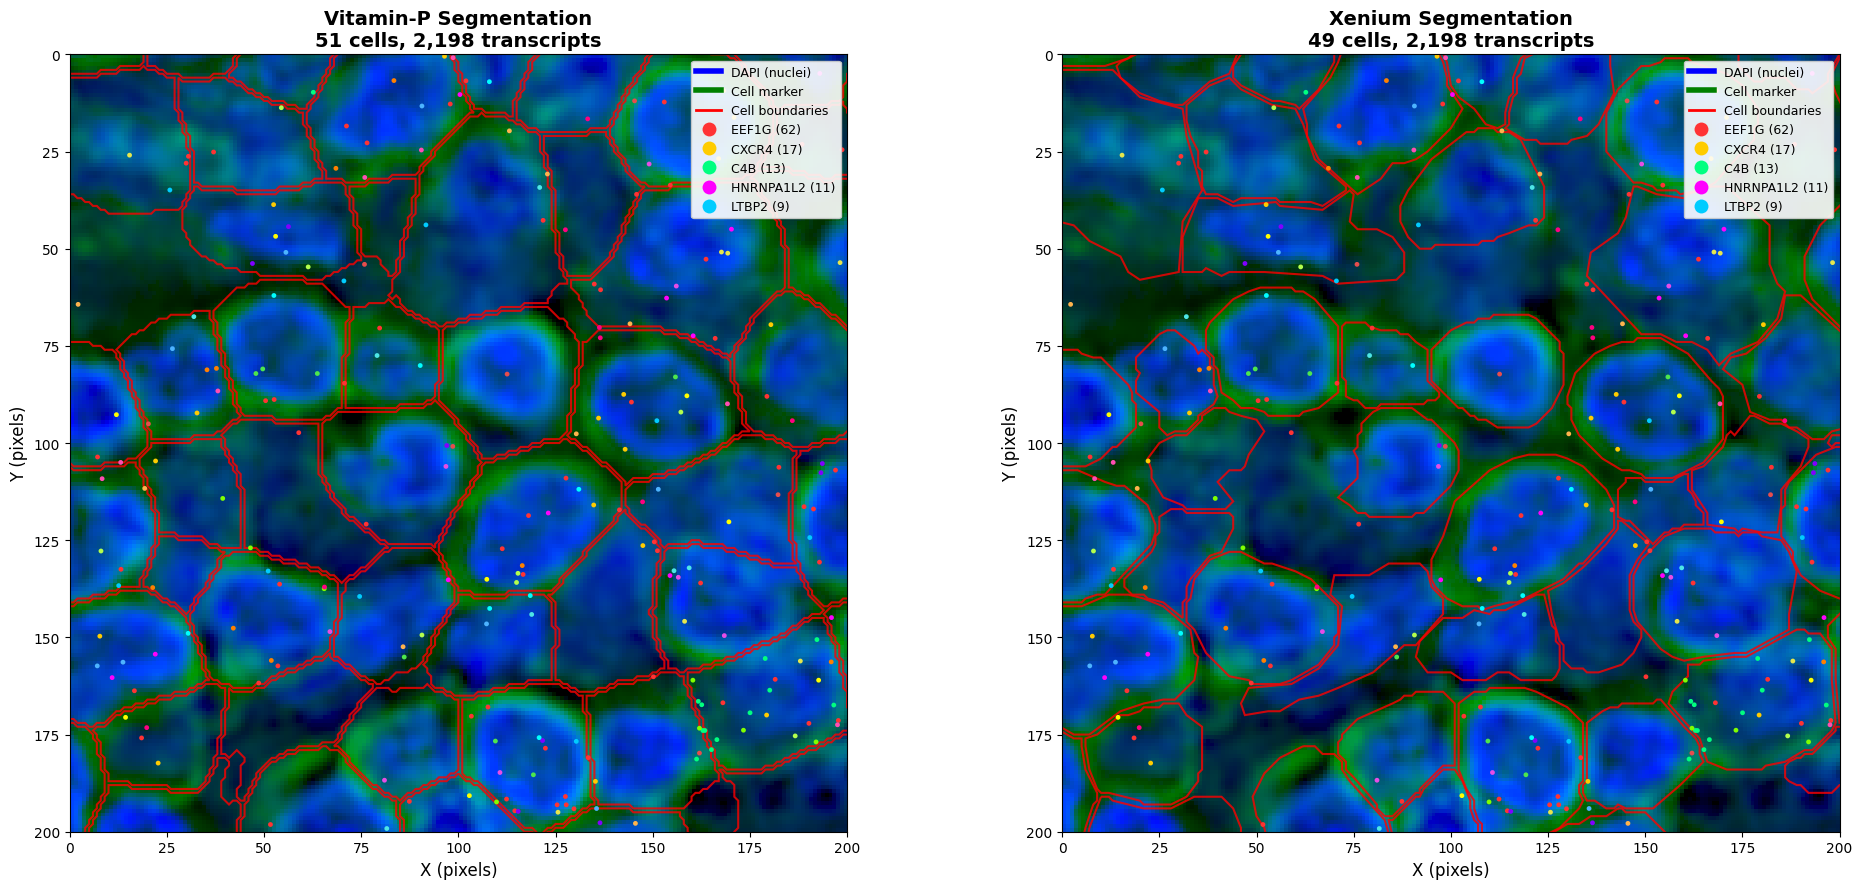


✅ Visualization complete!
  Showing 2,198 transcripts (30% sample)
  Top genes displayed with distinct colors

📄 Saved files:
  • vitamin_p_vs_xenium_comparison.pdf (both panels)
  • vitamin_p_panel.pdf (individual)
  • xenium_panel.pdf (individual)

These PDFs are fully editable in Adobe Illustrator!


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import tifffile
import json
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# CONFIGURATION
# ============================================================================
data_dir = "/rsrch9/home/plm/idso_fa1_pathology/TIER1/paul-xenium/Lung_Anthracosis/output-XETG00522__0057986__Region_1__20251203__234028"
results_dir = "results_new"

# Input files
vitamin_p_geojson = f"{results_dir}/vitamin-p-cell_segmentation_10k.geojson"
xenium_geojson = f"{results_dir}/xenium_cell_boundaries_10k_crop.geojson"
morphology_image = "test_images/combined_2channel_crop_10000x10000.ome.tif"

# ROI parameters
roi_x = 2450
roi_y = 4730
roi_size = 200
pixel_size = 0.2125  # microns per pixel

print("="*80)
print("VITAMIN-P vs XENIUM: ROI VISUALIZATION WITH TRANSCRIPTS")
print("="*80)

# ============================================================================
# LOAD DATA
# ============================================================================
print("\n[1] Loading morphology image...")
with tifffile.TiffFile(morphology_image) as tif:
    img = tif.asarray()
print(f"  Image shape: {img.shape}")

# Extract ROI from both channels
if len(img.shape) == 3 and img.shape[0] == 2:
    dapi_roi = img[0, roi_y:roi_y+roi_size, roi_x:roi_x+roi_size]
    cell_roi = img[1, roi_y:roi_y+roi_size, roi_x:roi_x+roi_size]
else:
    dapi_roi = img[roi_y:roi_y+roi_size, roi_x:roi_x+roi_size]
    cell_roi = dapi_roi.copy()

print(f"  ROI extracted: ({roi_x}, {roi_y}) -> ({roi_x+roi_size}, {roi_y+roi_size})")

# ============================================================================
# LOAD TRANSCRIPTS
# ============================================================================
print("\n[2] Loading transcripts...")
transcripts = pd.read_parquet(f"{data_dir}/transcripts.parquet")

# Get crop info from xenium geojson
with open(xenium_geojson, 'r') as f:
    xenium_data = json.load(f)
crop_info = xenium_data['metadata']['crop_region']
x_start = crop_info['x_start']
y_start = crop_info['y_start']

# Convert transcripts to pixel coordinates
transcripts['x_pixels'] = transcripts['x_location'] / pixel_size
transcripts['y_pixels'] = transcripts['y_location'] / pixel_size

# Filter to ROI
transcripts_roi = transcripts[
    (transcripts['x_pixels'] >= x_start + roi_x) & 
    (transcripts['x_pixels'] < x_start + roi_x + roi_size) &
    (transcripts['y_pixels'] >= y_start + roi_y) & 
    (transcripts['y_pixels'] < y_start + roi_y + roi_size)
].copy()

# Convert to local ROI coordinates
transcripts_roi['x_local'] = transcripts_roi['x_pixels'] - (x_start + roi_x)
transcripts_roi['y_local'] = transcripts_roi['y_pixels'] - (y_start + roi_y)

print(f"  Total transcripts in ROI: {len(transcripts_roi):,}")

# Sample MORE transcripts for visualization (30% for better density)
sample_frac = 0.3
transcripts_sample = transcripts_roi.sample(frac=sample_frac, random_state=42)
print(f"  Sampled transcripts for display: {len(transcripts_sample):,}")

# ============================================================================
# LOAD SEGMENTATIONS
# ============================================================================
print("\n[3] Loading segmentations...")

with open(vitamin_p_geojson, 'r') as f:
    vitamin_p_data = json.load(f)
vitamin_p_features = vitamin_p_data['features']
print(f"  Vitamin-P cells loaded: {len(vitamin_p_features):,}")

with open(xenium_geojson, 'r') as f:
    xenium_data = json.load(f)
xenium_features = xenium_data['features']
print(f"  Xenium cells loaded: {len(xenium_features):,}")

# ============================================================================
# EXTRACT CELLS IN ROI
# ============================================================================
print("\n[4] Extracting cells in ROI...")

def extract_roi_cells(features, roi_x, roi_y, roi_size):
    """Extract cells that overlap with ROI"""
    roi_cells = []
    
    for feature in features:
        coords = feature['geometry']['coordinates']
        if isinstance(coords[0][0][0], list):
            vertices = coords[0][0]
        else:
            vertices = coords[0]
        
        vertices = np.array(vertices)
        
        x_in = (vertices[:, 0] >= roi_x) & (vertices[:, 0] < roi_x + roi_size)
        y_in = (vertices[:, 1] >= roi_y) & (vertices[:, 1] < roi_y + roi_size)
        
        if np.any(x_in & y_in):
            vertices_local = vertices - np.array([roi_x, roi_y])
            roi_cells.append(vertices_local)
    
    return roi_cells

vp_roi_cells = extract_roi_cells(vitamin_p_features, roi_x, roi_y, roi_size)
xen_roi_cells = extract_roi_cells(xenium_features, roi_x, roi_y, roi_size)

print(f"  Vitamin-P cells in ROI: {len(vp_roi_cells)}")
print(f"  Xenium cells in ROI: {len(xen_roi_cells)}")

# ============================================================================
# VISUALIZATION
# ============================================================================
print("\n[5] Creating visualization...")

# Set PDF backend for editable output
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42  # TrueType fonts (editable text)
matplotlib.rcParams['ps.fonttype'] = 42   # TrueType fonts

fig, axes = plt.subplots(1, 2, figsize=(20, 9))

# Normalize images with brightness enhancement
def normalize_bright(img, percentile_low=1, percentile_high=99.5, boost=2.0):
    p_low = np.percentile(img, percentile_low)
    p_high = np.percentile(img, percentile_high)
    img_norm = np.clip((img - p_low) / (p_high - p_low + 1e-8), 0, 1)
    img_bright = np.power(img_norm, 1/boost)
    return img_bright

# Apply different brightness to each channel
dapi_norm = normalize_bright(dapi_roi, boost=2.5)
cell_norm = normalize_bright(cell_roi, boost=2.0)  # Less boost = darker green

# Further dim the green channel
cell_norm = cell_norm * 0.6  # Reduce green intensity by 40%

# Create RGB composite
rgb_vp = np.zeros((roi_size, roi_size, 3))
rgb_vp[:, :, 2] = dapi_norm  # Blue
rgb_vp[:, :, 1] = cell_norm  # Green (darker)

rgb_xen = rgb_vp.copy()

# Get top genes by count and assign distinct colors
gene_counts = transcripts_sample['feature_name'].value_counts()
top_genes = gene_counts.head(20).index.tolist()

# Create a brighter, more vibrant color palette
colors_bright = [
    [1.0, 0.2, 0.2, 1.0],  # Bright red
    [1.0, 0.8, 0.0, 1.0],  # Bright yellow
    [0.0, 1.0, 0.5, 1.0],  # Bright cyan-green
    [1.0, 0.0, 1.0, 1.0],  # Bright magenta
    [0.0, 0.8, 1.0, 1.0],  # Bright cyan
    [1.0, 0.5, 0.0, 1.0],  # Bright orange
    [0.5, 1.0, 0.0, 1.0],  # Bright lime
    [1.0, 0.0, 0.5, 1.0],  # Bright pink
    [0.5, 0.0, 1.0, 1.0],  # Bright purple
    [1.0, 1.0, 0.0, 1.0],  # Bright yellow
    [0.0, 1.0, 1.0, 1.0],  # Bright aqua
    [1.0, 0.3, 0.7, 1.0],  # Hot pink
    [0.7, 1.0, 0.3, 1.0],  # Yellow-green
    [0.3, 0.7, 1.0, 1.0],  # Sky blue
    [1.0, 0.7, 0.3, 1.0],  # Light orange
    [0.9, 0.3, 0.9, 1.0],  # Light magenta
    [0.3, 0.9, 0.9, 1.0],  # Turquoise
    [0.9, 0.9, 0.3, 1.0],  # Olive yellow
    [0.3, 0.9, 0.3, 1.0],  # Light green
    [0.9, 0.3, 0.3, 1.0],  # Coral
]

gene_to_color = {gene: colors_bright[i] for i, gene in enumerate(top_genes)}

# Assign lighter gray to other genes
for gene in transcripts_sample['feature_name'].unique():
    if gene not in gene_to_color:
        gene_to_color[gene] = [0.8, 0.8, 0.8, 0.7]  # Light gray

# --- Vitamin-P panel ---
axes[0].imshow(rgb_vp, extent=[0, roi_size, roi_size, 0], aspect='equal')
axes[0].set_xlim(0, roi_size)
axes[0].set_ylim(roi_size, 0)

# Draw cell boundaries
for vertices in vp_roi_cells:
    poly = Polygon(vertices, fill=False, edgecolor='red', linewidth=1.5, alpha=0.8)
    axes[0].add_patch(poly)

# Draw transcripts by gene group - LARGER, NO EDGE
for gene in top_genes:
    gene_tx = transcripts_sample[transcripts_sample['feature_name'] == gene]
    if len(gene_tx) > 0:
        axes[0].scatter(gene_tx['x_local'], gene_tx['y_local'], 
                       c=[gene_to_color[gene]], s=12, alpha=1.0, 
                       edgecolors='none', linewidths=0, label=gene)

axes[0].set_title(f'Vitamin-P Segmentation\n{len(vp_roi_cells)} cells, {len(transcripts_sample):,} transcripts', 
                 fontsize=14, fontweight='bold')
axes[0].set_xlabel('X (pixels)', fontsize=12)
axes[0].set_ylabel('Y (pixels)', fontsize=12)
axes[0].grid(False)

# --- Xenium panel ---
axes[1].imshow(rgb_xen, extent=[0, roi_size, roi_size, 0], aspect='equal')
axes[1].set_xlim(0, roi_size)
axes[1].set_ylim(roi_size, 0)

# Draw cell boundaries
for vertices in xen_roi_cells:
    poly = Polygon(vertices, fill=False, edgecolor='red', linewidth=1.5, alpha=0.8)
    axes[1].add_patch(poly)

# Draw transcripts by gene group - LARGER, NO EDGE
for gene in top_genes:
    gene_tx = transcripts_sample[transcripts_sample['feature_name'] == gene]
    if len(gene_tx) > 0:
        axes[1].scatter(gene_tx['x_local'], gene_tx['y_local'], 
                       c=[gene_to_color[gene]], s=12, alpha=1.0, 
                       edgecolors='none', linewidths=0)

axes[1].set_title(f'Xenium Segmentation\n{len(xen_roi_cells)} cells, {len(transcripts_sample):,} transcripts', 
                 fontsize=14, fontweight='bold')
axes[1].set_xlabel('X (pixels)', fontsize=12)
axes[1].set_ylabel('Y (pixels)', fontsize=12)
axes[1].grid(False)

# Add legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='blue', lw=4, label='DAPI (nuclei)'),
    Line2D([0], [0], color='green', lw=4, label='Cell marker'),
    Line2D([0], [0], color='red', lw=2, label='Cell boundaries'),
]

# Add top 5 genes to legend with brighter colors
for i, gene in enumerate(top_genes[:5]):
    legend_elements.append(
        Line2D([0], [0], marker='o', color='w', 
               markerfacecolor=gene_to_color[gene], 
               markersize=10, label=f'{gene} ({gene_counts[gene]})', 
               linestyle='None', markeredgecolor='none', markeredgewidth=0)
    )

axes[0].legend(handles=legend_elements, loc='upper right', fontsize=9, framealpha=0.9)
axes[1].legend(handles=legend_elements, loc='upper right', fontsize=9, framealpha=0.9)

plt.tight_layout()

# Save as editable PDF
output_pdf = "vitamin_p_vs_xenium_comparison.pdf"
plt.savefig(output_pdf, format='pdf', dpi=300, bbox_inches='tight')
print(f"\n✅ Saved editable PDF: {output_pdf}")

# Also save individual panels
fig_vp, ax_vp = plt.subplots(1, 1, figsize=(10, 9))
ax_vp.imshow(rgb_vp, extent=[0, roi_size, roi_size, 0], aspect='equal')
ax_vp.set_xlim(0, roi_size)
ax_vp.set_ylim(roi_size, 0)
for vertices in vp_roi_cells:
    poly = Polygon(vertices, fill=False, edgecolor='red', linewidth=1.5, alpha=0.8)
    ax_vp.add_patch(poly)
for gene in top_genes:
    gene_tx = transcripts_sample[transcripts_sample['feature_name'] == gene]
    if len(gene_tx) > 0:
        ax_vp.scatter(gene_tx['x_local'], gene_tx['y_local'], 
                     c=[gene_to_color[gene]], s=12, alpha=1.0, 
                     edgecolors='none', linewidths=0)
ax_vp.set_title(f'Vitamin-P Segmentation\n{len(vp_roi_cells)} cells, {len(transcripts_sample):,} transcripts', 
               fontsize=14, fontweight='bold')
ax_vp.set_xlabel('X (pixels)', fontsize=12)
ax_vp.set_ylabel('Y (pixels)', fontsize=12)
ax_vp.legend(handles=legend_elements, loc='upper right', fontsize=9, framealpha=0.9)
ax_vp.grid(False)
plt.tight_layout()
plt.savefig("vitamin_p_panel.pdf", format='pdf', dpi=300, bbox_inches='tight')
print(f"✅ Saved: vitamin_p_panel.pdf")
plt.close()

fig_xen, ax_xen = plt.subplots(1, 1, figsize=(10, 9))
ax_xen.imshow(rgb_xen, extent=[0, roi_size, roi_size, 0], aspect='equal')
ax_xen.set_xlim(0, roi_size)
ax_xen.set_ylim(roi_size, 0)
for vertices in xen_roi_cells:
    poly = Polygon(vertices, fill=False, edgecolor='red', linewidth=1.5, alpha=0.8)
    ax_xen.add_patch(poly)
for gene in top_genes:
    gene_tx = transcripts_sample[transcripts_sample['feature_name'] == gene]
    if len(gene_tx) > 0:
        ax_xen.scatter(gene_tx['x_local'], gene_tx['y_local'], 
                      c=[gene_to_color[gene]], s=12, alpha=1.0, 
                      edgecolors='none', linewidths=0)
ax_xen.set_title(f'Xenium Segmentation\n{len(xen_roi_cells)} cells, {len(transcripts_sample):,} transcripts', 
                fontsize=14, fontweight='bold')
ax_xen.set_xlabel('X (pixels)', fontsize=12)
ax_xen.set_ylabel('Y (pixels)', fontsize=12)
ax_xen.legend(handles=legend_elements, loc='upper right', fontsize=9, framealpha=0.9)
ax_xen.grid(False)
plt.tight_layout()
plt.savefig("xenium_panel.pdf", format='pdf', dpi=300, bbox_inches='tight')
print(f"✅ Saved: xenium_panel.pdf")
plt.close()

plt.show()

print("\n✅ Visualization complete!")
print(f"  Showing {len(transcripts_sample):,} transcripts ({sample_frac*100:.0f}% sample)")
print(f"  Top genes displayed with distinct colors")
print("\n📄 Saved files:")
print("  • vitamin_p_vs_xenium_comparison.pdf (both panels)")
print("  • vitamin_p_panel.pdf (individual)")
print("  • xenium_panel.pdf (individual)")
print("\nThese PDFs are fully editable in Adobe Illustrator!")
print("="*80)

## figure 3 c

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from shapely.geometry import Point, Polygon as ShapelyPolygon
from sklearn.preprocessing import StandardScaler
import umap
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# CONFIGURATION
# ============================================================================
data_dir = "/rsrch9/home/plm/idso_fa1_pathology/TIER1/paul-xenium/Lung_Anthracosis/output-XETG00522__0057986__Region_1__20251203__234028"
results_dir = "results_new"

vitamin_p_geojson = f"{results_dir}/vitamin-p-cell_segmentation_10k.geojson"
xenium_geojson = f"{results_dir}/xenium_cell_boundaries_10k_crop.geojson"

output_dir = "paper_analysis_results"
import os
os.makedirs(output_dir, exist_ok=True)

pixel_size = 0.2125
TRANSCRIPT_SAMPLE = 0.10  # Use only 10% for speed

print("Loading data...")

# Load segmentations
with open(vitamin_p_geojson, 'r') as f:
    vitamin_p_data = json.load(f)
with open(xenium_geojson, 'r') as f:
    xenium_data = json.load(f)

# Load and sample transcripts
transcripts = pd.read_parquet(f"{data_dir}/transcripts.parquet")
transcripts = transcripts.sample(frac=TRANSCRIPT_SAMPLE, random_state=42)  # Sample early
print(f"Using {len(transcripts):,} transcripts")

# Get crop info and filter
crop_info = xenium_data['metadata']['crop_region']
x_start, y_start = crop_info['x_start'], crop_info['y_start']
crop_size = crop_info['width']

transcripts['x'] = transcripts['x_location'] / pixel_size - x_start
transcripts['y'] = transcripts['y_location'] / pixel_size - y_start

transcripts = transcripts[
    (transcripts['x'] >= 0) & (transcripts['x'] < crop_size) &
    (transcripts['y'] >= 0) & (transcripts['y'] < crop_size)
]

print(f"Filtered to {len(transcripts):,} transcripts in crop")

# ============================================================================
# FAST ASSIGNMENT - Simple loop (good enough for 10% sample)
# ============================================================================
def assign_transcripts(features, transcripts_df):
    """Simple assignment - fast enough with 10% sample"""
    print(f"  Assigning {len(transcripts_df):,} transcripts...")
    
    # Build polygons
    polygons = []
    cell_ids = []
    for f in features:
        coords = f['geometry']['coordinates']
        if isinstance(coords[0][0][0], list):
            vertices = coords[0][0]
        else:
            vertices = coords[0]
        
        cell_id = f['properties'].get('id') or f['properties'].get('cell_id')
        if cell_id and len(vertices) > 2:
            polygons.append(ShapelyPolygon(vertices))
            cell_ids.append(cell_id)
    
    # Assign
    assignments = []
    for _, tx in transcripts_df.iterrows():
        point = Point(tx['x'], tx['y'])
        cell = None
        for poly, cid in zip(polygons, cell_ids):
            if poly.contains(point):
                cell = cid
                break
        assignments.append(cell)
    
    return assignments

print("Assigning transcripts...")
transcripts['vp_cell'] = assign_transcripts(vitamin_p_data['features'], transcripts)
transcripts['xen_cell'] = assign_transcripts(xenium_data['features'], transcripts)

vp_rate = transcripts['vp_cell'].notna().mean() * 100
xen_rate = transcripts['xen_cell'].notna().mean() * 100
print(f"Vitamin-P: {vp_rate:.1f}% assigned")
print(f"Xenium: {xen_rate:.1f}% assigned")

# ============================================================================
# CREATE EXPRESSION MATRICES
# ============================================================================
def make_matrix(df, cell_col):
    df = df[df[cell_col].notna()]
    counts = df.groupby([cell_col, 'feature_name']).size().unstack(fill_value=0)
    return counts

print("Creating expression matrices...")
vp_matrix = make_matrix(transcripts, 'vp_cell')
xen_matrix = make_matrix(transcripts, 'xen_cell')

print(f"Vitamin-P: {vp_matrix.shape[0]} cells x {vp_matrix.shape[1]} genes")
print(f"Xenium: {xen_matrix.shape[0]} cells x {xen_matrix.shape[1]} genes")

# ============================================================================
# UMAP
# ============================================================================
def run_umap(matrix, min_tx=20):
    """Run UMAP and clustering"""
    valid = matrix.sum(axis=1) >= min_tx
    mat = matrix[valid]
    
    if len(mat) < 50:
        return None, None, None, 0
    
    # Normalize and scale
    cpm = mat.div(mat.sum(axis=1), axis=0) * 1e6
    log_cpm = np.log1p(cpm)
    scaled = StandardScaler().fit_transform(log_cpm)
    
    # UMAP
    embedding = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42).fit_transform(scaled)
    
    # Cluster
    n_clusters = min(8, len(embedding) // 3)
    labels = KMeans(n_clusters=n_clusters, random_state=42, n_init=10).fit_predict(embedding)
    sil = silhouette_score(embedding, labels)
    
    return embedding, labels, mat.index, sil

print("Running UMAP...")
vp_umap, vp_labels, vp_cells, vp_sil = run_umap(vp_matrix)
xen_umap, xen_labels, xen_cells, xen_sil = run_umap(xen_matrix)

print(f"Vitamin-P Silhouette: {vp_sil:.3f}")
print(f"Xenium Silhouette: {xen_sil:.3f}")

# ============================================================================
# VISUALIZE
# ============================================================================
print("Creating visualizations...")

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Vitamin-P
if vp_umap is not None:
    axes[0].scatter(vp_umap[:, 0], vp_umap[:, 1], c=vp_labels, 
                   cmap='tab10', s=10, alpha=0.6)
    axes[0].set_title(f'Vitamin-P\n{len(vp_umap):,} cells | Silhouette: {vp_sil:.3f}', 
                     fontsize=14, fontweight='bold')
else:
    axes[0].text(0.5, 0.5, 'Insufficient cells', ha='center', va='center')
    axes[0].set_title('Vitamin-P', fontsize=14, fontweight='bold')

axes[0].set_xlabel('UMAP 1')
axes[0].set_ylabel('UMAP 2')
axes[0].grid(True, alpha=0.3)

# Xenium
if xen_umap is not None:
    axes[1].scatter(xen_umap[:, 0], xen_umap[:, 1], c=xen_labels, 
                   cmap='tab10', s=10, alpha=0.6)
    axes[1].set_title(f'Xenium\n{len(xen_umap):,} cells | Silhouette: {xen_sil:.3f}', 
                     fontsize=14, fontweight='bold')
else:
    axes[1].text(0.5, 0.5, 'Insufficient cells', ha='center', va='center')
    axes[1].set_title('Xenium', fontsize=14, fontweight='bold')

axes[1].set_xlabel('UMAP 1')
axes[1].set_ylabel('UMAP 2')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'{output_dir}/umap_comparison.png', dpi=300, bbox_inches='tight')
print(f"✅ Saved: {output_dir}/umap_comparison.png")

print("\nDone!")

/usr/local/lib/python3.11/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2026-01-27 20:38:35.884155: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-27 20:38:35.918513: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2026-01-27 20:38:35.918540: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2026-01-27 20:38:35.920130: E external/l

Loading data...
